In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

In [2]:
t = 0;dt = 0.003; s4 = 0;
chi=2; ci=chi; s5=0.7; factive=0.2; s7=0.01; s6=1-factive-s7-s4;
tnow =[]
ixnow = []
F1=[]
F2=[]
F3=[]
F4=[]
for i in range(1,150000+1):
    t = t + dt
    ni = 0
    if t>30 and t<60:
        ni = 100
        ci = chi
    if t>60 and t<90:
        ni = 0
        ci = 0
    if t>90 and t<130:
        ni = 100
        ci = 0
    if t>130 and t<160:
        ni = 100
        ci = chi
    if t>160 and t<190:
        ni = 100
        ci = 0
    if t>190 and t<220:
        ni = 100
        ci = chi
    if t>220 and t<250:
        ni = 100
        ci = 0
    if t>250 and t<280:
        ni = 0
        ci = chi
    if t>280 and t<310:
        ni = 100
        ci = 0
    if t>310 and t<340:
        ni = 0
        ci = 0
    if t>340 and t<370:
        ni = 100
        ci = 0
    if t>370 and t<400:
        ni = 0
        ci = 0
    if t>400 and t<430:
        ni = 100
        ci = chi
    if t>430 and t<460:
        ni = 0
        ci = 0
        
        
    f3n=ni**2.5/(ni**2.5+17**2.5)
    kcon1=0.1
    kcoff1=0.05
    kcon2=20 
    kcoff2=0.3
    kinact=0.2 
    #kinact=1
    #kinact=0.001 
    #kinact=1
    #kinact=0.2
    
    '''s5 = F1,
       s7 = F3, 
       s6 = F4,
       factive = F2'''
    
    s5 = s5 + (s6*ci*kcon1 - s5*kcoff1 + factive*f3n*kinact - s5*0.3)*dt
    factive = factive + (s7*ci*kcon2 - factive*kcoff2+s5*0.15 - factive*f3n*kinact)*dt
    s7 = s7 + (factive*kcoff2 + s6*0.1 - s7*ci*kcon2 - s7*f3n*kinact*25)*dt
    s6 = 1 - s5 - factive - s7
    
    F1.append(s5)
    F2.append(factive)
    F3.append(s7)
    F4.append(s6)
    
    incx=factive*f3n
    tnow.append(t)
    ixnow.append(incx)

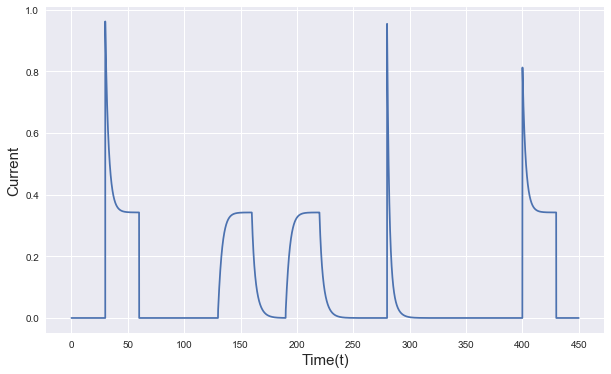

In [3]:
plt.figure(figsize = [10,6])
plt.plot(tnow,ixnow)
plt.xlabel("Time(t)",fontsize=15)
plt.ylabel("Current",fontsize=15)
plt.xticks([i*50 for i in range(10)])
plt.savefig("plot/current.png")
plt.savefig("plot/current.pdf")
plt.show()

In [5]:
[i*50 for i in range(10)]

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]

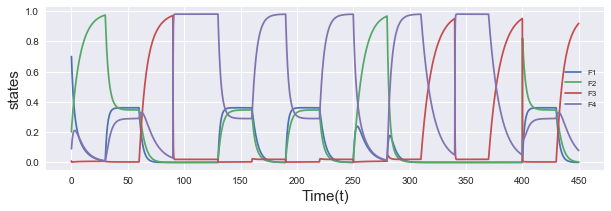

In [6]:
plt.figure(figsize = [10,3])
plt.plot(tnow,F1,label = "F1")
plt.plot(tnow,F2,label = "F2")
plt.plot(tnow,F3,label="F3")
plt.plot(tnow,F4,label="F4")
plt.xlabel("Time(t)",fontsize=15)
plt.ylabel("states",fontsize=15)
plt.xticks([i*50 for i in range(10)])
plt.legend(fontsize = 8)
plt.savefig("plot/states.png")
plt.savefig("plot/states.pdf")
plt.show()

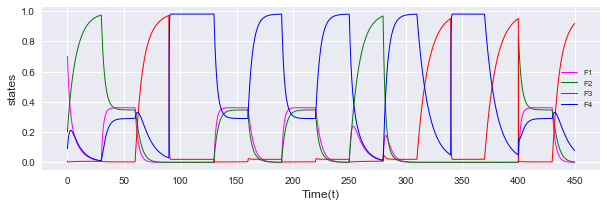

In [7]:
plt.figure(figsize = [10,3])
plt.plot(tnow,F1,label = "F1",color='magenta',linewidth = 1)
plt.plot(tnow,F2,label = "F2",color='green',linewidth = 1)
plt.plot(tnow,F3,label = "F3",color='red',linewidth = 1)
plt.plot(tnow,F4,label = "F4",color='blue',linewidth = 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks([i*50 for i in range(10)])
plt.xlabel("Time(t)",fontsize=12)
plt.ylabel("states",fontsize=12)
plt.legend(fontsize=8)
#plt.savefig('./plot/states.png')
#plt.savefig("plot/states.pdf")
plt.show()

### Na-dependent inactivation dictates activation by Ca

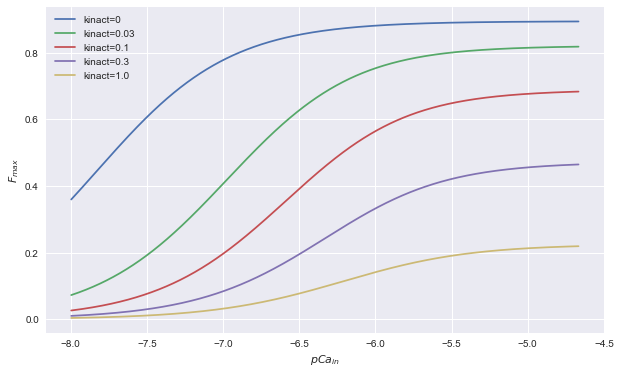

In [8]:
ni = 40
plt.figure(figsize = [10,6])
for kinact in [0, 0.03,0.1,0.3,1.0]:
    cinow = []
    ixnow = []
    for i in range(1,1001):
        
        logci = -(8-(i/300))
        ci = (10**(logci))*1000000
        f3n = (ni**2.5)/((ni**2.5)+(17**2.5))
        kcon1 = 0.1
        kcoff1 = 0.05
        kcon2 = 20
        kcoff2 = 0.3
    
    
        k2 = ci*kcon1
        k1 = kcoff1
        k5 = ci*kcon2
        k6 = kcoff2
        k8 = 0.3
        k7 = f3n*kinact
        k3 = 0.1
        k4 = f3n*kinact*25
    
    
        x1 = k2*k4*(k7+k6)+k5*k7*(k2+k3)
        x2 = k1*k7*(k4+k5)+k4*k6*(k1+k8)
        x3 = k1*k3*(k7+k6)+k8*k6*(k2+k3)
        x4 = k2*k8*(k4+k5)+k3*k5*(k1+k8)
        d = x1+x2+x3+x4
    
        e1 = x1/d
        e2 = x2/d
        e3 = x3/d
        e4 = x4/d
        incx = e4*f3n
        
        cinow.append(logci)
        ixnow.append(incx)
        
    plt.plot(cinow,ixnow,label= "kinact="+str(kinact))
    
plt.xlabel("$pCa_{in}$")
plt.ylabel("$F_{max}$")
plt.legend()
plt.savefig("plot/inact.png")
plt.savefig("plot/inact.pdf")
plt.show()